In [1]:
#####################################Built-in Python Libraries / Dependencies#########################################
#For dealing with json responses we receive from the API
import json
#For displaying the data
import pandas as pd
#For Statistical Computation
import numpy as np
#For saving the response data in CSV format
import csv
#Import string library function 
import string   
#For statistical Data Visualization based on matplotlib
#It provides a high-level interface for drawing attractive and informative statistical graphs
import seaborn as sns
#A comprehensive library for creating static, animated, and interactive visualizations / for plotting Graphs
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
#importing google maps and other libraries required to calculate the travel time and distance
import googlemaps
import requests
import json
import time
#Importing libraries required to find the optimum cluster value, Centroids, and nearest Latitude 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import sklearn
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [2]:
data = pd.read_csv("~/Desktop/SW postcodes.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#Dropping Irrelevant Columns
data = data.drop(['Terminated','National Park','Sewage Company','Local authority','Sewage Company',
                  'Parish','Water company', 'Police force', 'ITL level 2','ITL level 3'], axis=1)

In [4]:
#Print the head of the postcode area data set
dfT1=data.head()
dfT1

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,County,District,Ward,...,Quality,User Type,Last updated,Nearest station,Distance to station,Postcode area,Postcode district,Plus Code,Average Income,Travel To Work Area
0,SW10 0AA,Yes,51.477517,-0.179730,526508,176966,TQ265769,Greater London,Hammersmith and Fulham,Sands End,...,1,0,2021-11-12,Imperial Wharf,0.356831,SW,SW10,9C3XFRHC+24,56300,London
1,SW10 0AB,Yes,51.478206,-0.183053,526275,177037,TQ262770,Greater London,Kensington and Chelsea,Chelsea Riverside,...,1,0,2021-11-12,Imperial Wharf,0.362414,SW,SW10,9C3XFRH8+7Q,44600,London
2,SW10 0AD,Yes,51.485945,-0.180470,526433,177902,TQ264779,Greater London,Kensington and Chelsea,Stanley,...,1,0,2021-11-12,Gloucester Road,0.974046,SW,SW10,9C3XFRP9+9R,63300,London
3,SW10 0AE,Yes,51.485776,-0.180621,526423,177883,TQ264778,Greater London,Kensington and Chelsea,Stanley,...,1,0,2021-11-12,Gloucester Road,0.990195,SW,SW10,9C3XFRP9+8Q,63300,London
4,SW10 0AF,Yes,51.481480,-0.183053,526266,177401,TQ262774,Greater London,Kensington and Chelsea,Stanley,...,1,0,2021-11-12,Imperial Wharf,0.726045,SW,SW10,9C3XFRJ8+HQ,44600,London


In [5]:
#Print tail of the post code area data set
data.tail()

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,County,District,Ward,...,Quality,User Type,Last updated,Nearest station,Distance to station,Postcode area,Postcode district,Plus Code,Average Income,Travel To Work Area
19994,SW95 9DQ,Yes,51.480624,-0.136555,529497,177387,TQ294773,Greater London,Wandsworth,Queenstown,...,1,1,2021-11-12,Battersea Power Station,0.397193,SW,SW95,9C3XFVJ7+69,54100,London
19995,SW95 9DS,Yes,51.480624,-0.136555,529497,177387,TQ294773,Greater London,Wandsworth,Queenstown,...,1,1,2021-11-12,Battersea Power Station,0.397193,SW,SW95,9C3XFVJ7+69,54100,London
19996,SW95 9DU,Yes,51.480624,-0.136555,529497,177387,TQ294773,Greater London,Wandsworth,Queenstown,...,1,1,2021-11-12,Battersea Power Station,0.397193,SW,SW95,9C3XFVJ7+69,54100,London
19997,SW95 9EA,Yes,51.475661,-0.130378,529940,176846,TQ299768,Greater London,Lambeth,Stockwell,...,1,1,2021-11-12,Nine Elms,0.499455,SW,SW95,9C3XFVG9+7R,49900,London
19998,SW95 9EB,Yes,51.475661,-0.130378,529940,176846,TQ299768,Greater London,Lambeth,Stockwell,...,1,1,2021-11-12,Nine Elms,0.499455,SW,SW95,9C3XFVG9+7R,49900,London


In [6]:
#Print sample records of the postcode area data set
data.sample(5)

,Postcode,In Use?,Latitude,Longitude,Easting,Northing,Grid Ref,County,District,Ward,...,Quality,User Type,Last updated,Nearest station,Distance to station,Postcode area,Postcode district,Plus Code,Average Income,Travel To Work Area
5678,SW16 6EP,Yes,51.425430,-0.130530,530072,171260,TQ300712,Greater London,Lambeth,Streatham Wells,...,1,0,2021-11-12,Streatham,0.082149,SW,SW16,9C3XCVG9+5Q,54800,London
11608,SW1W 9DH,Yes,51.495379,-0.151195,528439,179002,TQ284790,Greater London,Westminster,Knightsbridge and Belgravia,...,1,0,2021-11-12,Victoria,0.459301,SW,SW1W,9C3XFRWX+5G,56300,London
3530,SW15 2HE,Yes,51.453926,-0.212876,524270,174286,TQ242742,Greater London,Wandsworth,East Putney,...,1,0,2021-11-12,East Putney,0.565574,SW,SW15,9C3XFQ3P+HR,66300,London
14719,SW3 6PU,Yes,51.491016,-0.171783,527022,178481,TQ270784,Greater London,Kensington and Chelsea,Stanley,...,1,0,2021-11-12,South Kensington,0.370362,SW,SW3,9C3XFRRH+C7,58100,London
3687,SW15 3AX,Yes,51.455610,-0.230226,523060,174444,TQ230744,Greater London,Wandsworth,West Putney,...,1,0,2021-11-12,Putney,1.114450,SW,SW15,9C3XFQ49+6W,52500,London


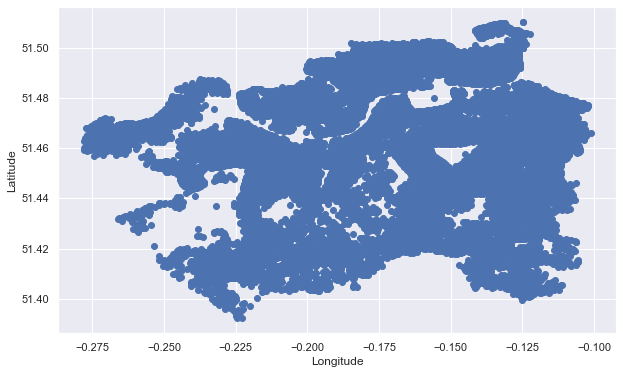

In [7]:
#Plotting a scatter plot against Latitude and Longitude
fig, scaplo_LL = plt.subplots(figsize=(10,6))
scaplo_LL.scatter(data['Longitude'], data['Latitude'])
scaplo_LL.set_xlabel('Longitude')
scaplo_LL.set_ylabel('Latitude')
plt.show()

<AxesSubplot:xlabel='Population'>

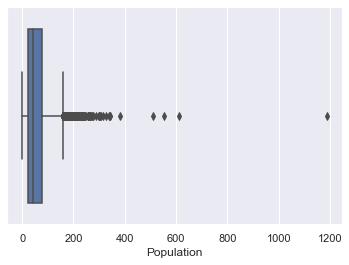

In [8]:
sns.boxplot(x=data['Population'])

<AxesSubplot:xlabel='Households'>

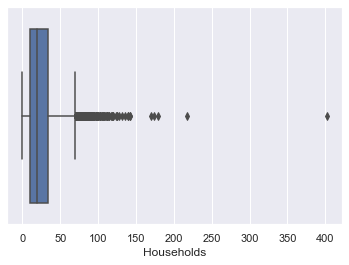

In [9]:
sns.boxplot(x=data['Households'])

<AxesSubplot:xlabel='Average Income'>

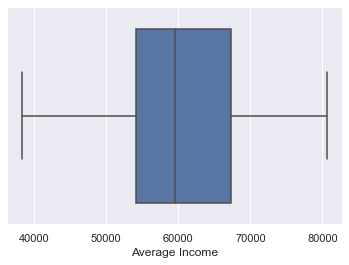

In [10]:
sns.boxplot(x=data['Average Income'])

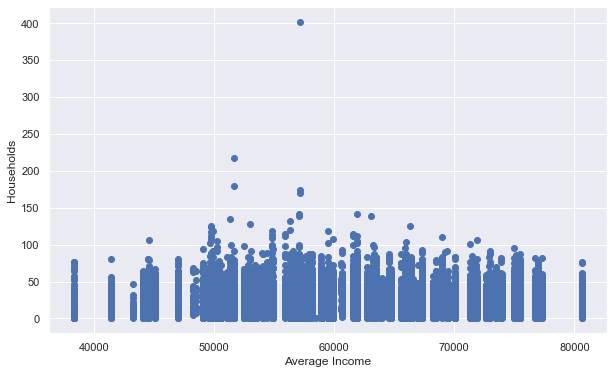

In [11]:
#Plotting a scatter plot - Average Income vs Households
fig, scaplot = plt.subplots(figsize=(10,6))
scaplot.scatter(data['Average Income'], data['Households'])
scaplot.set_xlabel('Average Income')
scaplot.set_ylabel('Households')
plt.show()

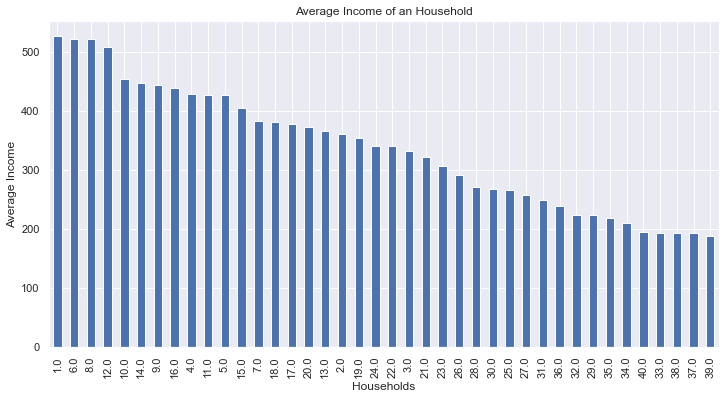

In [12]:
#Plotting a Histogram
data.Households.value_counts().nlargest(40).plot(kind='bar', figsize=(12,6))
plt.title("Average Income of an Household")
plt.ylabel('Average Income')
plt.xlabel('Households');

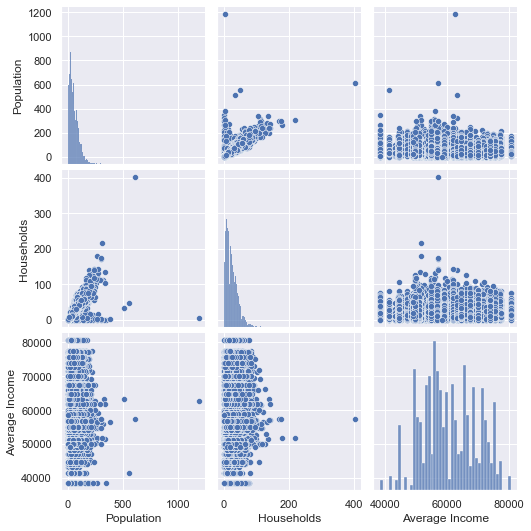

In [13]:
#Plotting the pair-plot for the Population, Households and Average Income of the postcode area 
sns.pairplot(data = data, vars=['Population','Households','Average Income'])
plt.show()

<AxesSubplot:>

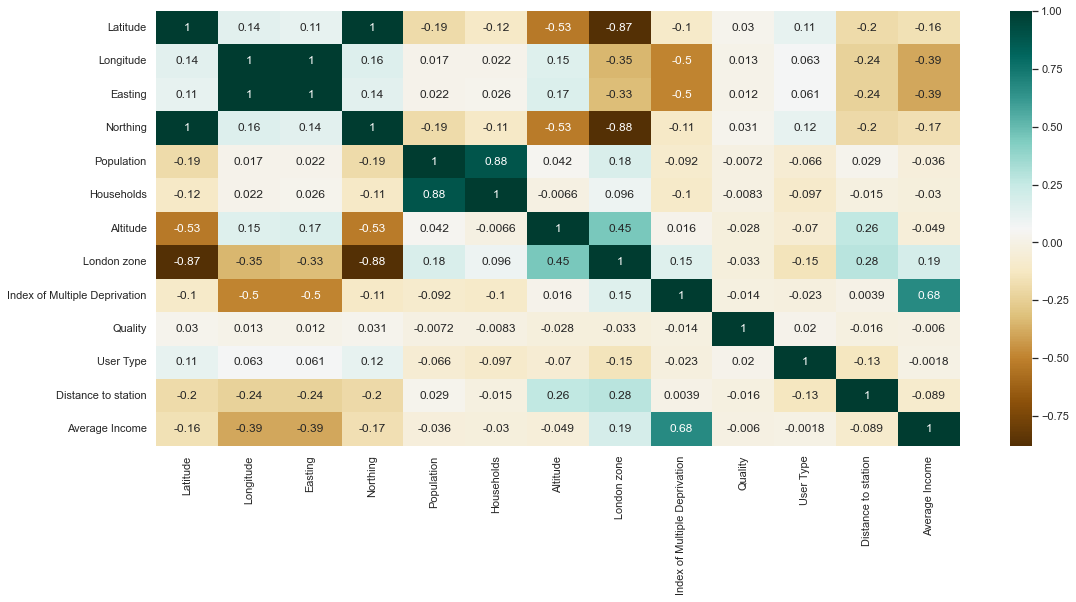

In [14]:
#Finding the relations between the data attributes
plt.figure(figsize=(18,8))
rel=data.corr()
sns.heatmap(rel,cmap="BrBG",annot=True)

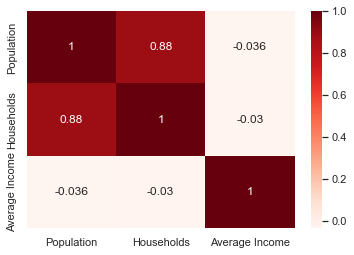

In [15]:
#Creating a matrix using 'Population', 'Households', 'Average Income' as rows and columns
data[['Population','Households','Average Income']].corr()

#Plot the correlation matrix of 'Population', 'Households', 'Average Income' for a postcode area 'SW'
sns.heatmap(data[['Population','Households','Average Income']].corr(), annot=True, cmap = 'Reds')
plt.show()

In [16]:
#Enter Google maps API Key here
api_key = ''
#URL variable to store google maps APIs
url ='https://maps.googleapis.com/maps/api/distancematrix/json?'
#Total source postcodes read from csv dataset from one postcode area
Orig_All_PC = data.Postcode
#Source postcode, sample of 5 records read from csv dataset from one postcode area 'SW' to calculate travel time
Orig_5PC = dfT1.Postcode       
#Source postcode to calculate travel time for a single source postcode
Orig_1PC = 'SW95 9DS'                  
#Destination post code is the postcode of UoR campus, Whiteknights
Dest_PostCode = 'RG6 6AH'           
deptime = 'now'
#Different Transport modes
Transport_mode = ['driving','transit','walking']

In [17]:
#Total Distance and Travel time from a single source postcode "SW95 9DS" to "RG6 6AH" UoR, Whiteknights Campus
req = requests.get(url + 
                   'origins=' + Orig_1PC + 
                   '&destinations=' + Dest_PostCode + 
                   '&mode=' + Transport_mode [0] + 
                   '&departure_time=' + deptime + 
                   '&key=' + api_key)
my_dist_dur=req.json()
distance = my_dist_dur['rows'][0]['elements'][0]['distance']['text']
print ("Total Distance from 'SW95 9DS' to 'UoR campus, Whiteknights (RG6 6AH):", distance)
duration = my_dist_dur['rows'][0]['elements'][0]['duration']['text']
print ("Car Travel Time from 'SW95 9DS' to Whiteknights:", duration)

req = requests.get(url + 
                   'origins=' + Orig_1PC + 
                   '&destinations=' + Dest_PostCode + 
                   '&mode=' + Transport_mode [1] + 
                   '&departure_time=' + deptime + 
                   '&key=' + api_key)

my_dist_dur=req.json()
duration = my_dist_dur['rows'][0]['elements'][0]['duration']['text']
print ("Public Transport Time from 'SW95 9DS' to Whiteknights:", duration)

req = requests.get(url + 
                   'origins=' + Orig_1PC + 
                   '&destinations=' + Dest_PostCode + 
                   '&mode=' + Transport_mode [2] + 
                   '&departure_time=' + deptime + 
                   '&key=' + api_key)
my_dist_dur=req.json()
duration = my_dist_dur['rows'][0]['elements'][0]['duration']['text']
print ("Walking Time from 'SW95 9DS' to Whiteknights:", duration)

Total Distance from 'SW95 9DS' to 'UoR campus, Whiteknights (RG6 6AH): 67.7 km
Car Travel Time from 'SW95 9DS' to Whiteknights: 1 hour 17 mins
Public Transport Time from 'SW95 9DS' to Whiteknights: 1 hour 48 mins
Walking Time from 'SW95 9DS' to Whiteknights: 12 hours 58 mins


In [18]:
PC5 = ['Postcode']
df5PC = pd.DataFrame(data=Orig_5PC,columns=PC5)

In [19]:
my_dist_dur = []
duration = []

In [20]:
TwoD_List=[]
pcd=0
while pcd < len (dfT1.Postcode):
    mod =0
    OneD_List = []
    while mod < len (Transport_mode):
        req=requests.get(url +
                         'origins=' + df5PC.iloc[pcd]['Postcode'] +
                         '&destinations=' + Dest_PostCode +
                         '&mode=' + Transport_mode [mod]+
                         '&departure_time=' + deptime +
                         '&key=' + api_key)
        my_dist_dur=req.json()
        duration = my_dist_dur['rows'][0]['elements'][0]['duration']['text']
        OneD_List.append(duration)
        mod +=1
    TwoD_List.append(OneD_List)
    pcd +=1
TT_C = ['Car Travel Time to Whiteknights','Public Transport Time to Whiteknights','Walking Time to Whiteknights']
df_5TT_Wh = pd.DataFrame(data=TwoD_List,columns=TT_C)
df_5TT_Wh

#Total code running duration using while loop: ( ~0 minutes 07.20 seconds)

,Car Travel Time to Whiteknights,Public Transport Time to Whiteknights,Walking Time to Whiteknights
0,1 hour 6 mins,1 hour 53 mins,12 hours 11 mins
1,1 hour 4 mins,1 hour 39 mins,12 hours 7 mins
2,1 hour 5 mins,1 hour 36 mins,12 hours 5 mins
3,1 hour 3 mins,1 hour 36 mins,12 hours 4 mins
4,1 hour 2 mins,1 hour 35 mins,12 hours 2 mins


In [21]:
TwoD_List = []
for pcd in range (0, 5):
    OneD_List = []
    for mod in range (0, 3):
        req=requests.get(url +
                         'origins=' + dfT1.iloc[pcd]['Postcode'] +
                         '&destinations=' + Dest_PostCode +
                         '&mode=' + Transport_mode [mod]+
                         '&departure_time=' + deptime +
                         '&key=' + api_key)
        my_dist_dur=req.json()
        duration = my_dist_dur['rows'][0]['elements'][0]['duration']['text']
        OneD_List.append(duration)
    TwoD_List.append(OneD_List)
TT_C = ['Car Travel Time to Whiteknights','Public Transport Time to Whiteknights','Walking Time to Whiteknights']
df_5TT_for = pd.DataFrame(data=TwoD_List,columns=TT_C)
df_5TT_for

#Total code running duration using for loop: ( ~0 minutes 07.80 seconds)

,Car Travel Time to Whiteknights,Public Transport Time to Whiteknights,Walking Time to Whiteknights
0,1 hour 6 mins,1 hour 53 mins,12 hours 11 mins
1,1 hour 4 mins,1 hour 39 mins,12 hours 7 mins
2,1 hour 5 mins,1 hour 36 mins,12 hours 5 mins
3,1 hour 3 mins,1 hour 36 mins,12 hours 4 mins
4,1 hour 2 mins,1 hour 35 mins,12 hours 2 mins


In [22]:
concat_PC_TT = pd.concat([df5PC, df_5TT_Wh], axis=1)
concat_PC_TT_C = ['Postcode',
                  'Car Travel Time to Whiteknights',
                  'Public Transport Time to Whiteknights',
                  'Walking Time to Whiteknights']
#Output results with postcode and travel times for all 3 modes using while loop
df_TT_Wh = pd.DataFrame(data=concat_PC_TT,columns=concat_PC_TT_C)
df_TT_Wh

,Postcode,Car Travel Time to Whiteknights,Public Transport Time to Whiteknights,Walking Time to Whiteknights
0,SW10 0AA,1 hour 6 mins,1 hour 53 mins,12 hours 11 mins
1,SW10 0AB,1 hour 4 mins,1 hour 39 mins,12 hours 7 mins
2,SW10 0AD,1 hour 5 mins,1 hour 36 mins,12 hours 5 mins
3,SW10 0AE,1 hour 3 mins,1 hour 36 mins,12 hours 4 mins
4,SW10 0AF,1 hour 2 mins,1 hour 35 mins,12 hours 2 mins


In [23]:
concat_PC_TT1 = pd.concat([df5PC, df_5TT_for], axis=1)
concat_PC_TT1_C = ['Postcode',
                   'Car Travel Time to Whiteknights',
                   'Public Transport Time to Whiteknights',
                   'Walking Time to Whiteknights']
#Output results with postcode and travel times for all 3 modes using for loop
df_TT_for = pd.DataFrame(data=concat_PC_TT1,columns=concat_PC_TT1_C)
df_TT_for

,Postcode,Car Travel Time to Whiteknights,Public Transport Time to Whiteknights,Walking Time to Whiteknights
0,SW10 0AA,1 hour 6 mins,1 hour 53 mins,12 hours 11 mins
1,SW10 0AB,1 hour 4 mins,1 hour 39 mins,12 hours 7 mins
2,SW10 0AD,1 hour 5 mins,1 hour 36 mins,12 hours 5 mins
3,SW10 0AE,1 hour 3 mins,1 hour 36 mins,12 hours 4 mins
4,SW10 0AF,1 hour 2 mins,1 hour 35 mins,12 hours 2 mins


In [24]:
Orig_All_PC_C = ['Postcode']
dfTPC = pd.DataFrame(data=Orig_All_PC, columns=Orig_All_PC_C)

In [25]:
TwoD_List = []
pcd=0
while pcd < len (dfT1.Postcode):
    mod =0
    OneD_List = []
    while mod < len (Transport_mode):
        req=requests.get(url +
                         'origins=' + df5PC.iloc[pcd]['Postcode'] +
                         '&destinations=' + Dest_PostCode +
                         '&mode=' + Transport_mode [mod]+
                         '&departure_time=' + deptime +
                         '&key=' + api_key)
        my_dist_dur=req.json()
        duration = my_dist_dur['rows'][0]['elements'][0]['duration']['text']
        OneD_List.append(duration)
        mod +=1
    TwoD_List.append(OneD_List)
    pcd +=1
TT_Col = ['Car Travel Time to Whiteknights',           #New Column - Car Travel Time to Whiteknights
          'Public Transport Time to Whiteknights',     #New Column - Public Transport Time to Whiteknights
          'Walking Time to Whiteknights']              #New Column - Walking Time to Whiteknights
#Building data frame with calculated travel times for all three travel modes
df_T = pd.DataFrame(data=TwoD_List,columns=TT_Col)  

TwoD1_List = []
pcd1=0
while pcd1 < len (dfT1.Postcode):
    mod1 =0
    OneD1_List = []
    while mod1 < len (Transport_mode):
        req=requests.get(url +
                         'origins=' + df5PC.iloc[pcd1]['Postcode'] +
                         '&destinations=' + Dest_PostCode +
                         '&mode=' + Transport_mode [mod1]+
                         '&departure_time=' + deptime +
                         '&key=' + api_key)
        my_dist_dur=req.json()
        distance = my_dist_dur['rows'][0]['elements'][0]['distance']['text']
        OneD1_List.append(distance)
        mod1 +=1
    TwoD1_List.append(OneD1_List)
    pcd1 +=1
Dist_Col = ['Driving Distance to Whiteknights',          #New Column - Driving Distance to Whiteknights
            'Public Transport Distance to Whiteknights', #New Column - Public Transport Distance to Whiteknights
            'Walking Distance to Whiteknights']          #New Column - Walking Distance to Whiteknights
#Building data frame with calculated driving distance
df_D = pd.DataFrame(data=TwoD1_List,columns=Dist_Col)

df_D_T = pd.concat([df_D, df_T], axis=1)
df_D_T_C = ['Driving Distance to Whiteknights',          #New Column - Driving Distance to Whiteknights
            'Public Transport Distance to Whiteknights', #New Column - Public Transport Distance to Whiteknights
            'Walking Distance to Whiteknights',          #New Column - Walking Distance to Whiteknights
            'Car Travel Time to Whiteknights',           #New Column - Car Travel Time to Whiteknights
            'Public Transport Time to Whiteknights',     #New Column - Public Transport Time to Whiteknights
            'Walking Time to Whiteknights']              #New Column - Walking Time to Whiteknights
#Concatenating both distance and travel time
df_D_Tt = pd.DataFrame(data=df_D_T,columns=df_D_T_C)

df_D_Tt_PC = pd.concat([df5PC, df_D_Tt], axis=1)
df_D_Tt_PC_C = ['Postcode',
                'Driving Distance to Whiteknights',          #New Column - Driving Distance to Whiteknights
                'Public Transport Distance to Whiteknights', #New Column - Public Transport Distance to Whiteknights
                'Walking Distance to Whiteknights',          #New Column - Walking Distance to Whiteknights
                'Car Travel Time to Whiteknights',           #New Column - Car Travel Time to Whiteknights
                'Public Transport Time to Whiteknights',     #New Column - Public Transport Time to Whiteknights
                'Walking Time to Whiteknights']              #New Column - Walking Time to Whiteknights
#Concatenating both distance and travel time via 3 different travel modes along with postcode
df_PC_D_T = pd.DataFrame(data=df_D_Tt_PC,columns=df_D_Tt_PC_C)
df_PC_D_T

#Total code running duration using while loop: ( 0 minutes ~14.39 seconds)

,Postcode,Driving Distance to Whiteknights,Public Transport Distance to Whiteknights,Walking Distance to Whiteknights,Car Travel Time to Whiteknights,Public Transport Time to Whiteknights,Walking Time to Whiteknights
0,SW10 0AA,63.7 km,68.2 km,59.0 km,1 hour 6 mins,1 hour 53 mins,12 hours 11 mins
1,SW10 0AB,63.2 km,67.8 km,58.7 km,1 hour 4 mins,1 hour 39 mins,12 hours 7 mins
2,SW10 0AD,63.3 km,68.2 km,58.5 km,1 hour 5 mins,1 hour 36 mins,12 hours 5 mins
3,SW10 0AE,62.9 km,68.5 km,58.5 km,1 hour 3 mins,1 hour 36 mins,12 hours 4 mins
4,SW10 0AF,62.7 km,67.4 km,58.3 km,1 hour 2 mins,1 hour 35 mins,12 hours 2 mins


In [26]:
X=[]
Y=[]
X=data.Latitude
Y=data.Longitude
LA = ['Latitude']
LO = ['Longitude']
LA_LO = ['Latitude','Longitude']

In [27]:
df_X = pd.DataFrame(data=X, columns = LA)
df_Y = pd.DataFrame(data=Y, columns = LO)
XY = pd.concat([df_X, df_Y], axis=1)
#Building data frame only with Latitude and Longitude
df_XY = pd.DataFrame(data=XY, columns=LA_LO)
df_XY

,Latitude,Longitude
0,51.477517,-0.179730
1,51.478206,-0.183053
2,51.485945,-0.180470
3,51.485776,-0.180621
4,51.481480,-0.183053
...,...,...
19994,51.480624,-0.136555
19995,51.480624,-0.136555
19996,51.480624,-0.136555
19997,51.475661,-0.130378


In [28]:
######################################################################################################################
############Determining number of Clusters for the Lat and Long dataset using elbow method############################
######################################################################################################################

In [29]:
#To give equal importance to all features, we need to scale the continuous features
#Apply scikit-learn’s MinMaxScaler as the feature matrix is a mix of binary and continuous features
mi_ma_sca = MinMaxScaler()
mi_ma_sca.fit(df_XY)
data_trans = mi_ma_sca.transform(df_XY)

In [30]:
#For each k value, initialise k-means and use the inertia attribute to identify the sum of squared distances of 
#samples to the nearest cluster centre
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_trans)
    Sum_of_squared_distances.append(km.inertia_)

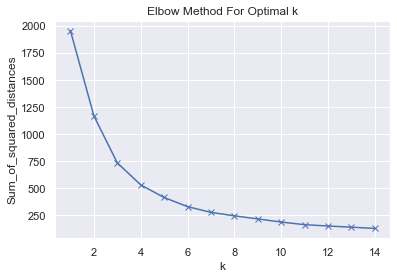

In [31]:
#Plot of sum of squared distances for k in the range specified 1 to 15 above
#If the plot looks like an arm, then the elbow on the arm is optimal k
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
######################################################################################################################
#In the plot below the elbow is at k=4 indicating the optimal k for the postcode dataset ‘SW’ is 4.
#Therefore, number of clusters used to find centroids are chosen as 4
#Also, another method called “Silhouette Analysis” is performed to cross check the chosen optimal k is valid

In [32]:
######################################################################################################################
############Determining number of clusters for the Lat and Long dataset using Silhouette score Analysis###############
######################################################################################################################

In [33]:
#Finding optimum number of clusters using "Silhouette Analysis" on KMeans Clustering.

#In this example sample size, the silhouette analysis is used to choose an optimal value for n_clusters. The 
#silhouette plot shows that the n_clusters value of 3, 5 and 6 are 'not good' pick for the given data due to the 
#presence of clusters with below average silhouette scores and also due to wide fluctuations in the size of the 
#silhouette plots. Silhouette analysis is more ambivalent in deciding between 2 and 4.
#Also, from the thickness of the silhouette plot the cluster size can be visualized.
#The silhouette plot for cluster 0 when n_clusters is equal to 2, is bigger in size owing to the grouping of the 
#3 sub-clusters into one big cluster. However, when the n_clusters is equal to 4, all the plots are more or less 
#of similar thickness and hence are of similar sizes as can be also verified from the labelled scatter plot on the 
#right.

#########Therefore n_clusters = 4 is chosen for finding centroids for the assessment using K-Means algorithm#########

For n_clusters = 2 The average silhouette score is : 0.6995537431272411
For n_clusters = 3 The average silhouette score is : 0.5905805054126707
For n_clusters = 4 The average silhouette score is : 0.6335802663157092
For n_clusters = 5 The average silhouette score is : 0.5415869739058775
For n_clusters = 6 The average silhouette score is : 0.4636016477868201


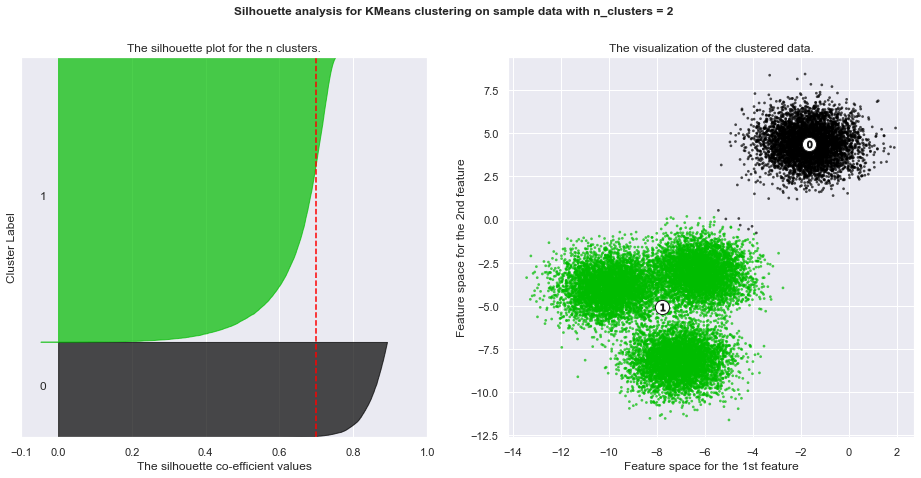

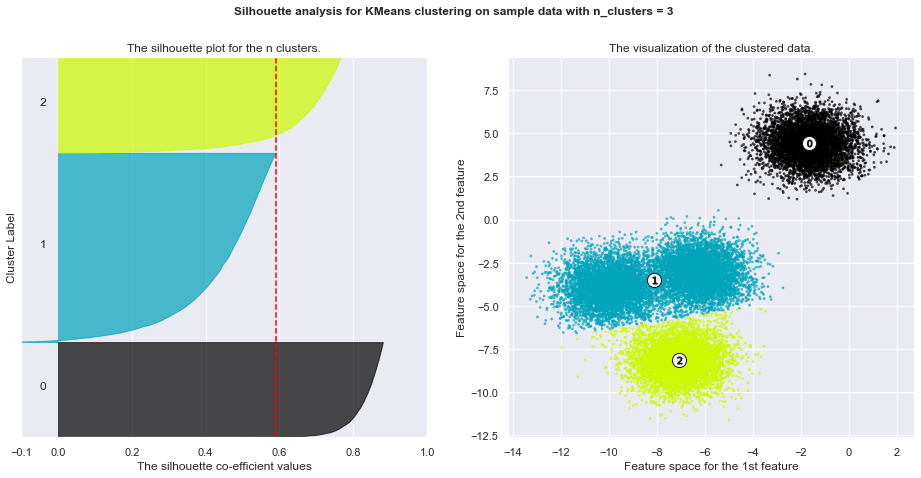

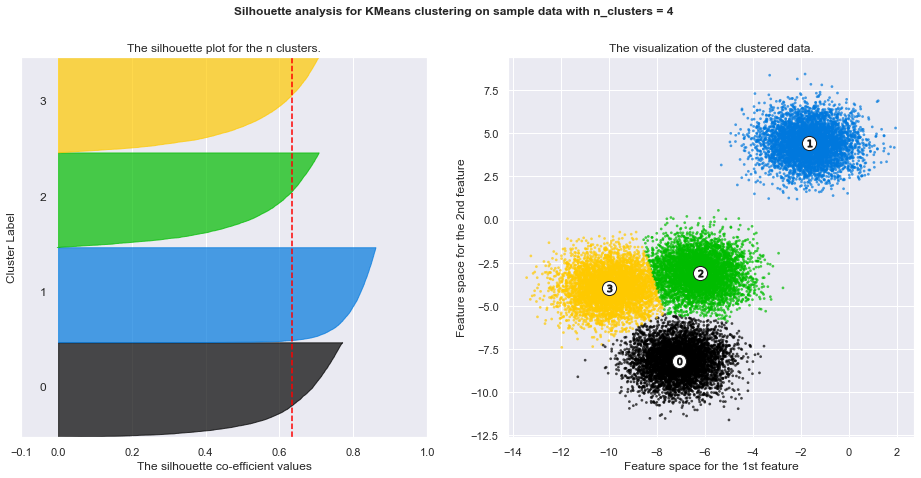

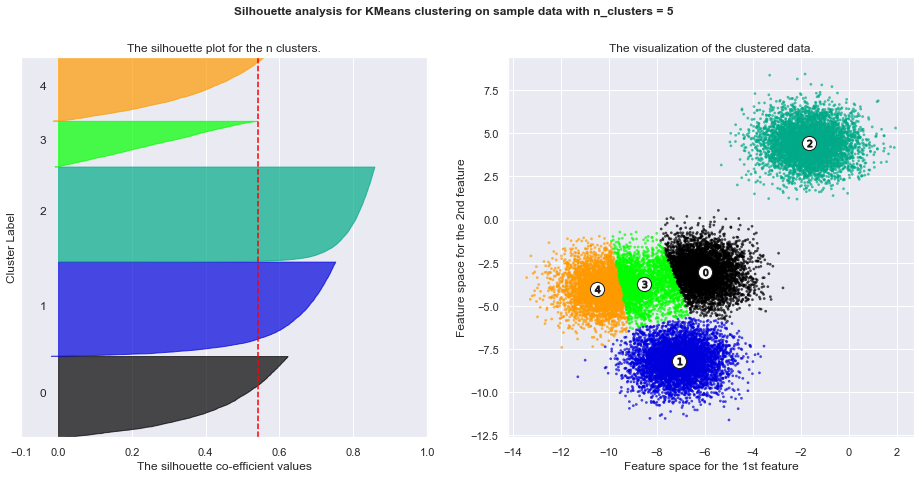

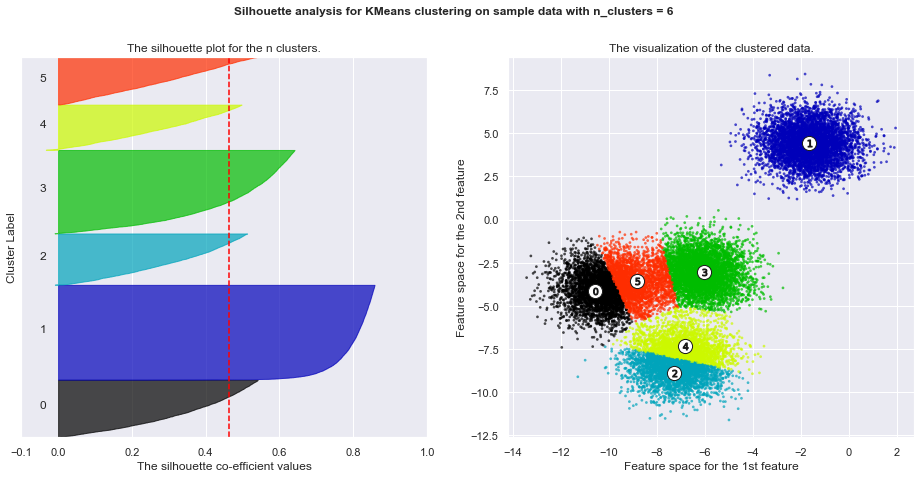

In [34]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close together
X, y = make_blobs(
    n_samples=19999,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(16, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1,1
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the n clusters.")
    ax1.set_xlabel("The silhouette co-efficient values")
    ax1.set_ylabel("Cluster Label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=12,
        fontweight="bold",
    )

plt.show()

#Total running time of the silhouette code during execution: ( ~1 minute 00.77 seconds)

In [35]:
######################################################################################################################
######################################################################################################################
######################################################################################################################
###########################Find Centroids using K-Means Algorithm#####################################################
########Finding Nearest pair of Latitude and Longitude match using Using Haversine Distance Equation##################
######################################################################################################################
######################################################################################################################
######################################################################################################################
######################################################################################################################

In [36]:
#Initialize KMeans object specifying the number of desired clusters
kmeans = KMeans(n_clusters=4) 

In [37]:
#Learning the clustering from the input date df_XY
kmeans.fit(df_XY.values)      

KMeans(n_clusters=4)

In [38]:
#Output the labels for the input data
print(kmeans.labels_)

[0 0 0 ... 1 1 1]


[[51.4438103  -0.22111452]
 [51.47921304 -0.13183705]
 [51.4331464  -0.14282149]
 [51.47970303 -0.18015941]]


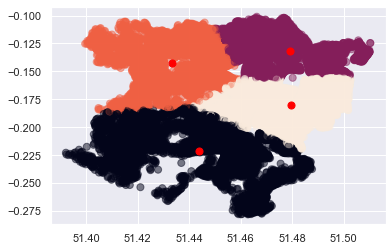

In [39]:
kmeans = KMeans(n_clusters=4).fit(df_XY)
centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(df_XY['Latitude'], df_XY['Longitude'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [40]:
df_Centroids = pd.DataFrame(data=centroids, index=["0", "1","2","3"], columns=["Cen_Latitude", 'Cen_Longitude'])
df_Centroids

,Cen_Latitude,Cen_Longitude
0,51.443810,-0.221115
1,51.479213,-0.131837
2,51.433146,-0.142821
3,51.479703,-0.180159


In [41]:
postcodes_df = data [['Postcode','Latitude','Longitude']]

In [42]:
#Find the closest postcode
closest_pc_df = pd.DataFrame(columns=['Postcode','Latitude','Longitude'])

for everylat in df_Centroids['Cen_Latitude']:
    i = (postcodes_df['Latitude']-everylat).abs().argsort()[:1]
    closest_pc_df = closest_pc_df.append(postcodes_df.loc[i])

closest_pc_df

,Postcode,Latitude,Longitude
2136,SW12 8EB,51.443813,-0.163092
18392,SW8 1XZ,51.479212,-0.122470
9354,SW19 7HN,51.433149,-0.199089
19224,SW9 6DZ,51.479703,-0.111059


In [43]:
closest_pc_df1 = closest_pc_df
closest_pc_df1

,Postcode,Latitude,Longitude
2136,SW12 8EB,51.443813,-0.163092
18392,SW8 1XZ,51.479212,-0.122470
9354,SW19 7HN,51.433149,-0.199089
19224,SW9 6DZ,51.479703,-0.111059


In [44]:
#Renaming the column names to reduce the number of letters to be typed in the code
closest_pc_df1=closest_pc_df1.rename(columns = {'Latitude':'lat','Longitude':'lon'})
T2df=data.rename(columns = {'Latitude':'lat','Longitude':'lon'})

In [45]:
#define distance calc function using Haversine method
from math import radians, cos, sin, asin, sqrt
def dist(lat1, long1, lat2, long2):
    #Calculate the great circle distance between two points on the earth (specified in decimal degrees)
    #Convert decimal degrees to radians 
    lat1, long1, lat2, long2 = map(radians, [lat1, long1, lat2, long2])
    # Haversine Formula 
    dlon = long2 - long1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

#define nearest calc function 
def find_nearest(lat, long):
    distances = closest_pc_df1.apply(
        lambda row: dist(lat, long, row['lat'], row['lon']), 
        axis=1)
    return closest_pc_df1.loc[distances.idxmin(), 'lat']

In [46]:
#Finding the nearest Latitude for each postcode (one postcode area) based on centroid latitude and longitude, and 
#replacing the latitude with the nearest latitude value 
T2df['lat'] = T2df.apply(
    lambda row: find_nearest(row['lat'], row['lon']), 
    axis=1)

In [47]:
#Save the output in XLS file
T2df.to_excel ("~/Desktop/SY28812368_S2T2_SW.xlsx", index = True, header=True)

In [48]:
closest_resdf = pd.DataFrame(columns=['Postcode',
                                      'Car Travel Time to Whiteknights',
                                      'Public Transport Time to Whiteknights',
                                      'Walking Time to Whiteknights'])

In [49]:
#Define the function to extract the values from json
def json_extract(obj,key):
    ArryLis = []
    def extract (obj, ArryLis, key): 
        #Search for values of jey in json
        if isinstance (obj, dict):
            for k,v in obj.items():
                if isinstance (v,(dict,list)):
                    extract (v,ArryLis,key)
                elif k == key:
                    ArryLis.append(v)
        elif isinstance (obj,list):
            for item in obj:
                extract(item, ArryLis, key)
        return ArryLis
        
    values = extract(obj,ArryLis,key)
    return values

In [50]:
#Destination post code is the postcode of UoR campus, Whiteknights
Dest_PostCode = 'RG6 6AH'           
deptime = 'now'
#Different Transit types
Transport_mode = ['driving','transit','walking']
traveltimeresL =[]
for row in closest_pc_df.itertuples(index=False):
    orig_cl_pc, cl_pc_lat, cl_pc_long = row[:3]
    response_car=requests.get(url +
                         'origins=' + orig_cl_pc +
                         '&destinations=' + Dest_PostCode +
                         '&mode=' + Transport_mode [0]+
                         '&departure_time=' + deptime +
                         '&key=' + api_key)
    response_Public=requests.get(url +
                         'origins=' + orig_cl_pc +
                         '&destinations=' + Dest_PostCode +
                         '&mode=' + Transport_mode [1]+
                         '&departure_time=' + deptime +
                         '&key=' + api_key)
    response_walk=requests.get(url +
                         'origins=' + orig_cl_pc +
                         '&destinations=' + Dest_PostCode +
                         '&mode=' + Transport_mode [2]+
                         '&departure_time=' + deptime +
                         '&key=' + api_key)
    response_car.json()
    response_Public.json()
    response_walk.json()
        
    TTtime = json_extract(response_car.json(),'text')
    TTbycar = TTtime [1::2]
    TTtime = json_extract(response_Public.json(),'text')
    TTbyPublic = TTtime [1::2]
    TTtime = json_extract(response_walk.json(),'text')
    TTbyWalk = TTtime [1::2]
    
    traveltimeL = {'Postcode': orig_cl_pc,
                   'Latitude': cl_pc_lat,
                   'Longitude': cl_pc_long,
                   'Car Travel Time to Whiteknights': TTbycar,
                   'Public Transport Time to Whiteknights': TTbyPublic,
                   'Walking Time to Whiteknights': TTbyWalk
                  }
    traveltimeresL.append(traveltimeL)

In [51]:
centroid_resdf = pd.DataFrame(traveltimeresL)
centroid_resdf

,Postcode,Latitude,Longitude,Car Travel Time to Whiteknights,Public Transport Time to Whiteknights,Walking Time to Whiteknights
0,SW12 8EB,51.443813,-0.163092,[1 hour 13 mins],[1 hour 59 mins],[12 hours 34 mins]
1,SW8 1XZ,51.479212,-0.122470,[1 hour 18 mins],[1 hour 43 mins],[13 hours 10 mins]
2,SW19 7HN,51.433149,-0.199089,[1 hour 4 mins],[1 hour 26 mins],[12 hours 11 mins]
3,SW9 6DZ,51.479703,-0.111059,[1 hour 21 mins],[1 hour 39 mins],[13 hours 16 mins]


In [52]:
#Storing the sets of punctuation in variable result 
result = string.punctuation     
def remove_punct (s):
    s ="".join([ch for ch in s if ch not in result])
    return s
centroid_resdf ['Car Travel Time to Whiteknights'] = centroid_resdf ['Car Travel Time to Whiteknights'].apply(lambda x: remove_punct(x))
centroid_resdf ['Public Transport Time to Whiteknights'] = centroid_resdf ['Public Transport Time to Whiteknights'].apply(lambda x: remove_punct(x))
centroid_resdf ['Walking Time to Whiteknights'] = centroid_resdf ['Walking Time to Whiteknights'].apply(lambda x: remove_punct(x))

In [53]:
centroid_resdf

,Postcode,Latitude,Longitude,Car Travel Time to Whiteknights,Public Transport Time to Whiteknights,Walking Time to Whiteknights
0,SW12 8EB,51.443813,-0.163092,1 hour 13 mins,1 hour 59 mins,12 hours 34 mins
1,SW8 1XZ,51.479212,-0.122470,1 hour 18 mins,1 hour 43 mins,13 hours 10 mins
2,SW19 7HN,51.433149,-0.199089,1 hour 4 mins,1 hour 26 mins,12 hours 11 mins
3,SW9 6DZ,51.479703,-0.111059,1 hour 21 mins,1 hour 39 mins,13 hours 16 mins


In [54]:
data_LLP=pd.read_csv("~/Desktop/SW postcodes.csv", usecols= ('Postcode','Latitude','Longitude'))
data_LLP

,Postcode,Latitude,Longitude
0,SW10 0AA,51.477517,-0.179730
1,SW10 0AB,51.478206,-0.183053
2,SW10 0AD,51.485945,-0.180470
3,SW10 0AE,51.485776,-0.180621
4,SW10 0AF,51.481480,-0.183053
...,...,...,...
19994,SW95 9DQ,51.480624,-0.136555
19995,SW95 9DS,51.480624,-0.136555
19996,SW95 9DU,51.480624,-0.136555
19997,SW95 9EA,51.475661,-0.130378


In [55]:
#Compare Centroids with one postcode area (19k+ records) and populate the travel times for all the 19+k postcodes
for row in data_LLP.itertuples(index=True):
    index,Dorig,Dlat,Dlong = row[:4]
    
    #Find the closest Lat and get the index
    ind = (centroid_resdf ['Latitude']-Dlat).abs().argsort()[:1]
    
    #Get the travel time of car, public and walk from res colums
    car = centroid_resdf.loc[ind,'Car Travel Time to Whiteknights']
    public =centroid_resdf.loc[ind,'Public Transport Time to Whiteknights']
    walk = centroid_resdf.loc[ind,'Walking Time to Whiteknights']
    
    #reterive the values from series
    cart = pd.Series(car).values
    pubt = pd.Series(public).values
    walkt = pd.Series(walk).values
    
    #Set the travel time values for all 19k+ postcodes with thier respective values
    data_LLP.loc [index,'Car Travel Time to Whiteknights'] = cart
    data_LLP.loc [index,'Public Transport Time to Whiteknights'] = pubt
    data_LLP.loc [index,'Walking Time to Whiteknights'] = walkt

data_LLP

,Postcode,Latitude,Longitude,Car Travel Time to Whiteknights,Public Transport Time to Whiteknights,Walking Time to Whiteknights
0,SW10 0AA,51.477517,-0.179730,[1 hour 18 mins],[1 hour 43 mins],[13 hours 10 mins]
1,SW10 0AB,51.478206,-0.183053,1 hour 18 mins,1 hour 43 mins,13 hours 10 mins
2,SW10 0AD,51.485945,-0.180470,1 hour 21 mins,1 hour 39 mins,13 hours 16 mins
3,SW10 0AE,51.485776,-0.180621,1 hour 21 mins,1 hour 39 mins,13 hours 16 mins
4,SW10 0AF,51.481480,-0.183053,1 hour 21 mins,1 hour 39 mins,13 hours 16 mins
...,...,...,...,...,...,...
19994,SW95 9DQ,51.480624,-0.136555,1 hour 21 mins,1 hour 39 mins,13 hours 16 mins
19995,SW95 9DS,51.480624,-0.136555,1 hour 21 mins,1 hour 39 mins,13 hours 16 mins
19996,SW95 9DU,51.480624,-0.136555,1 hour 21 mins,1 hour 39 mins,13 hours 16 mins
19997,SW95 9EA,51.475661,-0.130378,1 hour 18 mins,1 hour 43 mins,13 hours 10 mins


In [56]:
#Create a new data frame 
T3df = data_LLP[['Postcode',
                 'Car Travel Time to Whiteknights',
                 'Public Transport Time to Whiteknights',
                 'Walking Time to Whiteknights']]
T3df

,Postcode,Car Travel Time to Whiteknights,Public Transport Time to Whiteknights,Walking Time to Whiteknights
0,SW10 0AA,[1 hour 18 mins],[1 hour 43 mins],[13 hours 10 mins]
1,SW10 0AB,1 hour 18 mins,1 hour 43 mins,13 hours 10 mins
2,SW10 0AD,1 hour 21 mins,1 hour 39 mins,13 hours 16 mins
3,SW10 0AE,1 hour 21 mins,1 hour 39 mins,13 hours 16 mins
4,SW10 0AF,1 hour 21 mins,1 hour 39 mins,13 hours 16 mins
...,...,...,...,...
19994,SW95 9DQ,1 hour 21 mins,1 hour 39 mins,13 hours 16 mins
19995,SW95 9DS,1 hour 21 mins,1 hour 39 mins,13 hours 16 mins
19996,SW95 9DU,1 hour 21 mins,1 hour 39 mins,13 hours 16 mins
19997,SW95 9EA,1 hour 18 mins,1 hour 43 mins,13 hours 10 mins


In [57]:
#Save the output in XLS file
T3df.to_excel ("~/Desktop/SY28812368_S2T3_SW.xlsx", index = True, header=True)